In [3]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import pandas
from numpy.linalg import norm
import math


In [4]:
data = pandas.read_csv('tsp.csv', header=None)
data = data.to_numpy()
n = len(data)
print(n, data[0][0])

52 1


In [5]:
def graph(a, data):
    n = len(data)
    y = []
    x = []
    min_len = length(a, data)
    fig, ax = plt.subplots()
    for i in range(n):
        x.append(data[a[i]][1])
        y.append(data[a[i]][2])
    ax.scatter(x, y, s=5, c='r')
    for i in range(n-1):
        ax.plot([data[a[i]][1], data[a[i+1]][1]], [data[a[i]][2], data[a[i]][2]], c='b', linewidth=1.0)
        ax.plot([data[a[i+1]][1], data[a[i+1]][1]], [data[a[i]][2], data[a[i+1]][2]], c='b', linewidth=1.0)

    fig.set_figwidth(10)
    fig.set_figheight(10)
    ax.text(1000, 1200, 'Значение целевой функции: ' + str(int(min_len)))


In [6]:
def length(a, data):
    all_l1 = 0
    for i in range(len(a)-1):
        x = abs(data[a[i]][1] - data[a[i+1]][1])
        y = abs(data[a[i]][2] - data[a[i+1]][2])
        all_l1 += norm([x, y])
    return all_l1


## Монте-Карло

In [96]:
Count = 1000000
min_arr = [i for i in range(n)]
min_len = length(min_arr, data)
for i in range(Count):
    a_new = min_arr[::]
    random.shuffle(a_new)
    l = length(a_new, data)
    if l < min_len:
        min_len = l
        min_arr = a_new

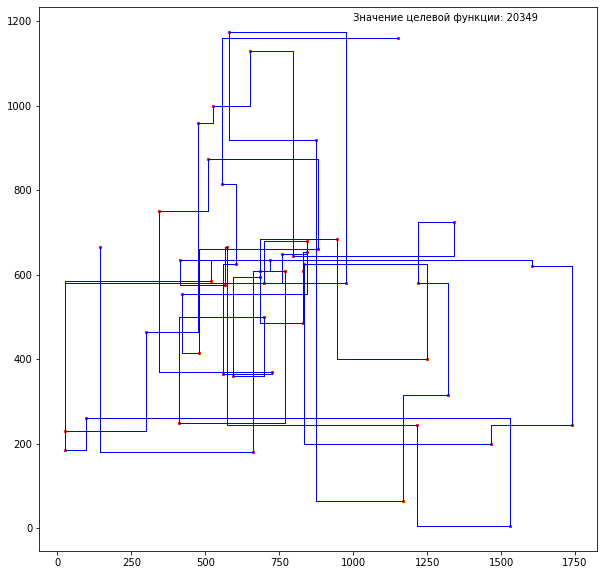

In [97]:
graph(min_arr, data)

## Случайное блуждание

In [88]:
Count = 10000
min_arr = [i for i in range(n)]
min_len = length(min_arr, data)
for i in range(Count):
    new_a = min_arr[::]
    s = random.randint(0, n-1)
    e = random.randint(s+1, n)
    new_a[s:e] = reversed(new_a[s:e])
    l = length(new_a, data)
    if l < min_len:
        min_len = l
        min_arr = new_a

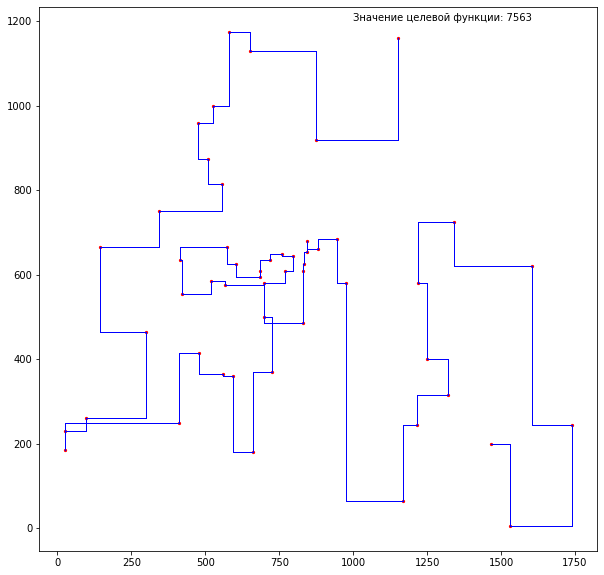

In [89]:
graph(min_arr, data)

## Hill Climb

In [86]:
Count = 100
min_arr = [i for i in range(n)]
min_len = length(min_arr, data)
for i in range(Count):
    for s in range(n-2):
        for e in range(s+1, n):
            new_a = min_arr[::]
            p = new_a[s]
            new_a[s] = new_a[e]
            new_a[e] = p

            l = length(new_a, data)
            if l < min_len:
                min_len = l
                min_arr = new_a

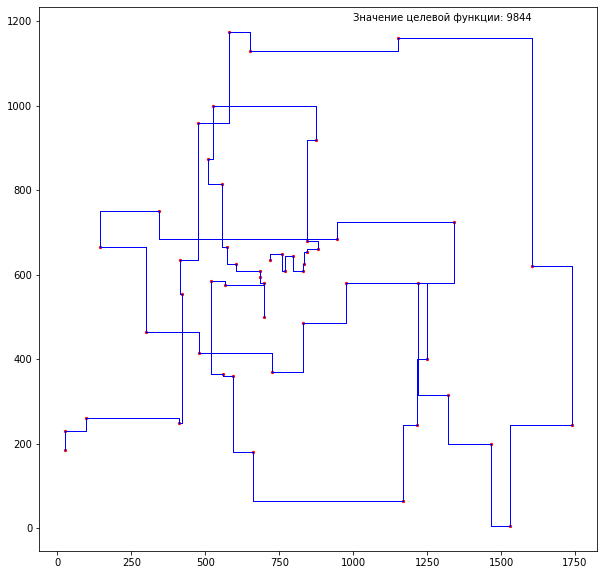

In [87]:
graph(min_arr, data)

## Отжиг

In [98]:
Count = 10000
min_arr = [i for i in range(n)]
min_len = length(min_arr, data)
T = 100
step = (T-0.001)/Count
T += step
for i in range(Count):
    T -= step
    s = random.randint(0, n-1)
    e = random.randint(s+1, n)
    new_a = min_arr[::]
    new_a[s:e] = reversed(new_a[s:e])
    l = length(new_a, data)
    delta = l - min_len
    if delta <= 0:
        min_arr = new_a
        min_len = l
    else:
        prob = math.exp(-delta/T)
        if random.random() < prob:
            min_arr = new_a
            min_len = l

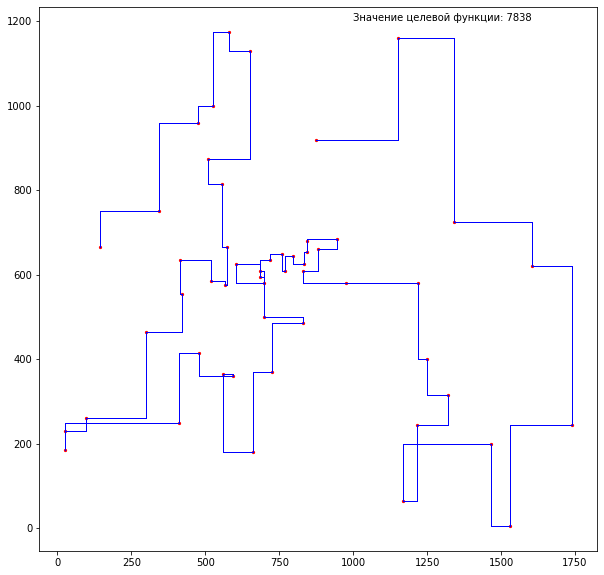

In [99]:
graph(min_arr, data)


## Генетический алгоритм

In [49]:
def in_array(big_array, some_array):
    if not big_array:
        return False
    for i in range(len(big_array)):
        if big_array[i][1] == some_array:
            return True
    return False

In [73]:
def gen(parent1, parent2):
    n = len(parent1)
    child1 = [0]*n
    child2 = [0]*n
    s = random.randint(0, 26)
    e = random.randint(26, n)
    child1[s:e] = parent1[s:e][::]
    child2[s:e] = parent2[s:e][::]
    use1 = set(parent1[s:e])
    use2 = set(parent2[s:e])

    for i in range(0,s):
        for j in range(n):
            if parent2[j] not in use1:
                use1.add(parent2[j])
                child1[i] = parent2[j]
                break

    for i in range(e,n):
        for j in range(n):
            if parent2[j] not in use1:
                use1.add(parent2[j])
                child1[i] = parent2[j]
                break
    for i in range(0,s):
        for j in range(n):
            if parent1[j] not in use2:
                use2.add(parent1[j])
                child2[i] = parent1[j]
                break

    for i in range(e,n):
        for j in range(n):
            if parent1[j] not in use2:
                use2.add(parent1[j])
                child2[i] = parent1[j]
                break

    s = random.randint(0, n-2)
    e = random.randint(s+1, n-1)
    child1[s:e] = reversed(child1[s:e])
    s = random.randint(0, n-2)
    e = random.randint(s+1, n-1)
    child2[s:e] = reversed(child2[s:e])


    return child1, child2




In [74]:
Count = 1000
population = 100
array_of_path = []
start = [i for i in range(n)]
l = length(start, data)
array_of_path.append((l, start))
for i in range(population):
    a = start[::]
    random.shuffle(a)
    while in_array(array_of_path, a):
        random.shuffle(a)
    l = length(a, data)
    array_of_path.append((l, a))
for i in range(Count):
    array_of_path = sorted(array_of_path)
    new_array_of_path = []
    for step in range(population//2):
        first = random.randint(0, population//10)
        second = random.randint(0, population-1)
        while second == first:
            second = random.randint(0, population-1)
        parent1 = array_of_path[first][1]
        parent2 = array_of_path[second][1]

        child1, child2 = gen(parent1, parent2)
        l1 = length(child1, data)
        l2 = length(child2, data)
        new_array_of_path.append((l1, child1))
        new_array_of_path.append((l2, child2))
    array_of_path = new_array_of_path.copy()


array_of_path = sorted(array_of_path, key=lambda tup: tup[0])
min_arr = array_of_path[0][1]

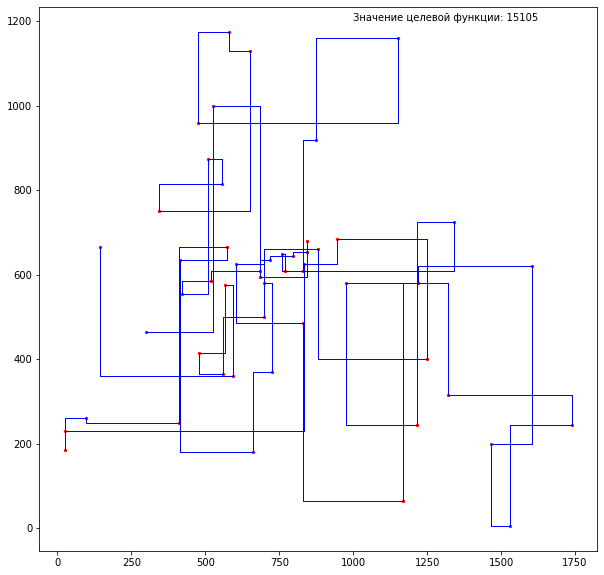

In [75]:
graph(min_arr, data)